In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from itertools import cycle, islice
import seaborn as sns
import pandas as pd
import csv
import json
import ast
from six.moves import cPickle as pickle

In [2]:
pd.options.display.max_columns = None # quitamos la acotación al número de columnas

In [3]:
def load_data(file_path):
    df = pd.read_csv(file_path, dtype='unicode')
    # all json columns`
    columns = df.columns
    for column in columns:
        # usamos ast.literal_eval() para evaluar lo que hay dentro del objeto json y convertilo tipos conocicos por Python
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

MOVIES METADATA

In [4]:
metadata = pd.read_csv('./Datasets/movies_metadata.csv')
metadata.head(2)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [9]:
# Obtenemos el índice de varias peliculas para eliminarlas, ya que tienen los valores desplazados 
#varias posicones a la izquierda y no era posible obtener su id y más datos relevantes.
index = metadata[np.isnan(metadata['revenue'])].index.tolist()
metadata = metadata.drop(index, axis = 0) 
metadata = metadata.reset_index(drop=True)

In [10]:
ast.literal_eval(metadata["belongs_to_collection"][4])

{'id': 96871,
 'name': 'Father of the Bride Collection',
 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg',
 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}

In [11]:
ast.literal_eval(metadata["belongs_to_collection"][0])["name"]

'Toy Story Collection'

In [12]:
ast.literal_eval(metadata["genres"][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [13]:
ast.literal_eval(metadata["genres"][0])[0]["id"]

16

In [14]:
ast.literal_eval(metadata["spoken_languages"][0])

[{'iso_639_1': 'en', 'name': 'English'}]

In [15]:
def load_metadata(df):
    # all json columns`
    columns = df.columns
    for column in columns:
        # usamos ast.literal_eval() para evaluar lo que hay dentro del objeto json y convertilo tipos conocicos por Python
        df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    return df

In [16]:
metadata_json = load_metadata(metadata.iloc[:, [1, 3, 12, 13, 17]])

<ipython-input-15-8cfd0664779e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))


In [17]:
def df_metadata_json(df):
    dframe = pd.DataFrame(index=range(len(df)),
                          columns=["belongs_to_collection", "genres", "production_companies",
                                  "production_countries", "spoken_languages"])
    
    for fila in range(len(df)):
        lista_i = []
        lista_g = []
        lista_c = []
        lista_coun = []
        lista_l = []
        
        if type(df["belongs_to_collection"][fila]) == dict:
            dframe["belongs_to_collection"][fila] = df["belongs_to_collection"][fila]["name"]
        else:
            dframe["belongs_to_collection"][fila] = float("nan")
        for genre in range(len(df["genres"][fila])):
            lista_g.append(df["genres"][fila][genre]["name"])
        dframe["genres"][fila] = lista_g
        if type(df["production_companies"][fila]) == list:
            for companies in range(len(df["production_companies"][fila])):
                lista_c.append(df["production_companies"][fila][companies]["name"])
            dframe["production_companies"][fila] = lista_c
        else:
            dframe["production_companies"][fila] = float("nan")
        if type(df["production_countries"][fila]) == list:
            for country in range(len(df["production_countries"][fila])):
                lista_coun.append(df["production_countries"][fila][country]["name"])
            dframe["production_countries"][fila] = lista_coun
        else:
            dframe["production_countries"][fila] = float("nan")
        if type(df["spoken_languages"][fila]) == list:
            for language in range(len(df["spoken_languages"][fila])):
                lista_l.append(df["spoken_languages"][fila][language]["name"])
            dframe["spoken_languages"][fila] = lista_l
        else:
            dframe["spoken_languages"][fila] = float("nan")
        
    return dframe

In [23]:
metadata_json_done = df_metadata_json(metadata_json)

In [24]:
metadata_json_done[0:2]

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"


In [25]:
len(metadata_json_done)==len(metadata)

True

In [26]:
# Cambiamos el tipo de datos de la columna id para que el merge sea correcto
metadata["id"] = metadata["id"].astype(int)
type(metadata["id"])

pandas.core.series.Series

In [29]:
cols = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]
for col in cols:
    metadata.pop(col)

In [30]:
metadata = metadata.join(metadata_json_done)

In [31]:
# Eliminamos el nombre del archivo del poster, la web y la trama de cada película, ya que no nos va a servir.
metadata = metadata.drop(columns=['poster_path', 'homepage', 'overview', 'tagline', 'video'])

In [32]:
metadata[0:2]

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,False,30000000,862,tt0114709,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,False,65000000,8844,tt0113497,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"


RATINGS

In [33]:
ratings = pd.read_csv('./Datasets/ratings.csv')

In [34]:
ratings = ratings.rename(columns={"movieId": "id"})

In [35]:
type(ratings["id"])

pandas.core.series.Series

In [36]:
ratings["id"] = ratings["id"].astype(int)
type(ratings["id"])

pandas.core.series.Series

In [37]:
ratings = ratings.iloc[:,1:3]

In [38]:
ratings[1:2]

,id,rating
1,147,4.5


In [39]:
ratings = ratings.groupby("id", as_index=False).sum() # con as_index evitamos que el "id" se ponga de formna automática como índice

In [40]:
ratings[0:5]

,id,rating
0,1,256649.5
1,2,84355.0
2,3,49211.5
3,4,8572.5
4,5,46988.0


In [41]:
len(ratings)

45115

In [42]:
filtro = metadata["id"].isin(ratings['id'])
len(metadata[filtro])

7569

CREDITS

In [43]:
credits = load_data("./Datasets/credits.csv")

In [44]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [45]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [46]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [47]:
credits["cast"][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [48]:
credits["crew"][0][0:10]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [49]:
credits['director'] = credits['crew'].apply(lambda x: [job['name'] for job in x if job['job'] == 'Director']).apply(lambda x: x[0] if x else np.nan)
credits['director'][0:2]

0    John Lasseter
1     Joe Johnston
Name: director, dtype: object

In [50]:
#Con order = 0 cogemos el actor principal
credits['actor'] = credits['cast'].apply(lambda x: [actor['name'] for actor in x if actor['order'] == 0]).apply(lambda x: x[0] if x else np.nan)

In [51]:
len(credits[pd.isna(credits['actor'])==True])

8737

In [52]:
# Hay peliculas que no tienen catalogado actores como order=0, se coge order=1
actor_1 = pd.DataFrame({'id': credits[pd.isna(credits['actor'])]["id"]})
# ids = credits[pd.isna(credits['actor'])]["id"]
actor_1["actor_1"] = credits[pd.isna(credits['actor'])]['cast'].apply(lambda x: [actor['name'] for actor in x if actor['order'] == 1]).apply(lambda x: x[0] if x else np.nan)

In [53]:
credits = pd.merge(left=credits, how = "left", right=actor_1, left_on='id', right_on='id')         

In [54]:
for i in range(len(credits)):
    if pd.isna(credits.loc[i, ["actor"]])[0]:
        credits["actor"][i] = credits["actor_1"][i]

<ipython-input-54-f9d2c1ea00b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credits["actor"][i] = credits["actor_1"][i]


In [55]:
credits = credits.drop(columns = "actor_1")

In [56]:
# credits[0:37]

In [57]:
len(credits[pd.isna(credits['actor'])==True])

2707

In [58]:
# Hay titulos que no tienen información de reparto. Serán eliminadas más adelante
credits[pd.isna(credits['actor'])==True]

,cast,crew,id,director,actor
137,[],"[{'credit_id': '52fe4ab0c3a368484e161d3d', 'de...",124639,Sandip Ray,NaN
240,[],"[{'credit_id': '52fe464ac3a36847f80f6d61', 'de...",43475,Art Clokey,NaN
393,[],"[{'credit_id': '52fe4624c3a36847f80ef0a5', 'de...",42981,Theodore Thomas,NaN
438,[],"[{'credit_id': '52fe448dc3a368484e029383', 'de...",24257,Bruce Brown,NaN
595,[],"[{'credit_id': '52fe4aacc3a368484e16115b', 'de...",124472,Jean Bach,NaN
...,...,...,...,...,...
45465,[],"[{'credit_id': '5981a15c92514151e0011b51', 'de...",455661,Beth David,NaN
45470,[],"[{'credit_id': '52fe4684c3a36847f81034f3', 'de...",44330,Georges Méliès,NaN
45476,[],"[{'credit_id': '52fe4a74c3a368484e1542e9', 'de...",122036,Georges Méliès,NaN
45480,[],"[{'credit_id': '539ef1090e0a263dd00000d7', 'de...",276895,Robert Gardner,NaN


In [59]:
credits.index[credits['id'] == 124639].tolist()

[137]

Unión de dataframes

In [60]:
Dataset = pd.merge(left=metadata, how = "left", right=ratings, left_on='id', right_on='id')

In [61]:
Dataset = pd.merge(left=Dataset, how = "left", right=credits[['id', 'director', 'actor']], left_on='id', right_on='id')

In [62]:
Dataset['release_date'] = Dataset['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan).apply(lambda x: 1956 if x == 'nan' else x)

In [63]:
Dataset.head(3)

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,rating,director,actor
0,False,30000000,862,tt0114709,en,Toy Story,21.9469,1995,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English],1346.0,John Lasseter,Tom Hanks
1,False,65000000,8844,tt0113497,en,Jumanji,17.0155,1995,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",462.5,Joe Johnston,Robin Williams
2,False,0,15602,tt0113228,en,Grumpier Old Men,11.7129,1995,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English],NaN,Howard Deutch,Walter Matthau


Text(0.5, 1.0, 'Director revenue')

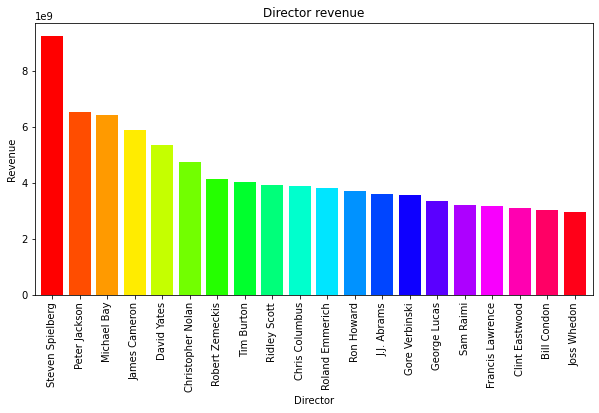

In [64]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
revenue_director = Dataset.groupby("director")["revenue"].sum().sort_values(ascending = False)
plt.figure(figsize = (10, 5)) 
revenue_director[0:20].plot.bar(color = colors , width = 0.8)
plt.xlabel('Director')
plt.ylabel('Revenue')
plt.title('Director revenue')

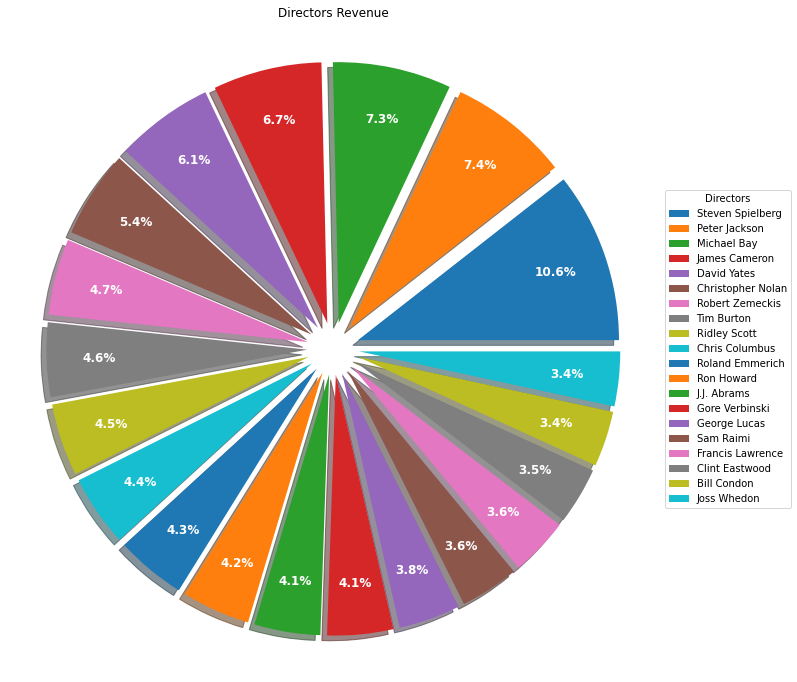

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(revenue_director[0:20], autopct='%1.1f%%', pctdistance=0.8,
                                  textprops=dict(color="w"), explode=np.repeat(0.1, 20), shadow= True)

ax.legend(revenue_director[0:20].index,
          title="Directors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Directors Revenue")

plt.show()

In [67]:
revenue_director = revenue_director.map(lambda x : x/revenue_director[0])
director_ratio = dict()
i = 0
for director in revenue_director.index:
    director_ratio[director] = revenue_director[i]
    i+=1
Director_ratio = Dataset[Dataset['director'].notnull()][["id", "director"]]
Director_ratio["director_ratio"] = Director_ratio["director"].apply(lambda x: director_ratio[x])
Dataset = pd.merge(left=Dataset, how = "left", right=Director_ratio[['id', 'director_ratio']], left_on='id', right_on='id')

Text(0.5, 1.0, 'Actors revenue')

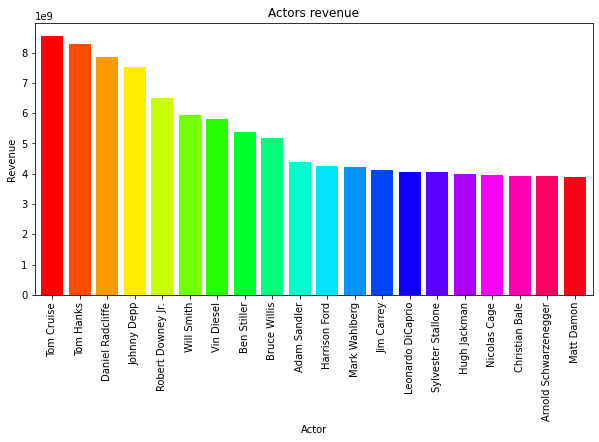

In [68]:
revenue_actor = Dataset.groupby("actor")["revenue"].sum().sort_values(ascending = False)
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
plt.figure(figsize = (10, 5)) 
revenue_actor[0:20].plot.bar(color = colors , width = 0.8)
plt.xlabel('Actor')
plt.ylabel('Revenue')
plt.title('Actors revenue')

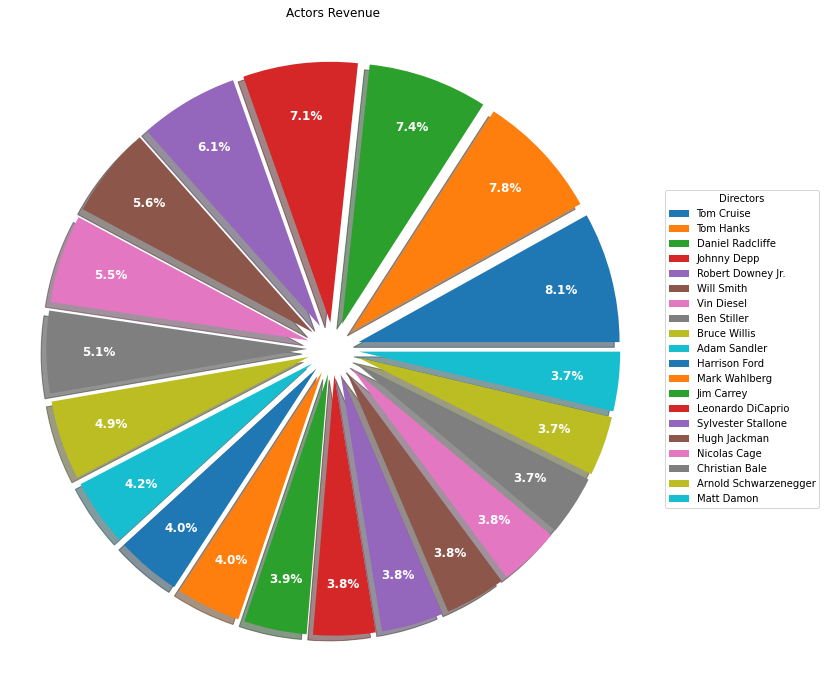

In [69]:
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(revenue_actor[0:20], autopct='%1.1f%%', pctdistance=0.8,
                                  textprops=dict(color="w"), explode=np.repeat(0.1, 20), shadow= True)

ax.legend(revenue_actor[0:20].index,
          title="Directors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Actors Revenue")

plt.show()

In [70]:
revenue_actor = revenue_actor.map(lambda x : x/revenue_director[0])
actor_ratio = dict()
i = 0
for actor in revenue_actor.index:
    actor_ratio[actor] = revenue_actor[i]
    i+=1
Actor_ratio = Dataset[Dataset['actor'].notnull()][["id", "actor"]]
Actor_ratio["actor_ratio"] = Actor_ratio["actor"].apply(lambda x: actor_ratio[x])
Dataset = pd.merge(left=Dataset, how = "left", right=Actor_ratio[['id', 'actor_ratio']], left_on='id', right_on='id')

Text(0.5, 1.0, 'Films revenue')

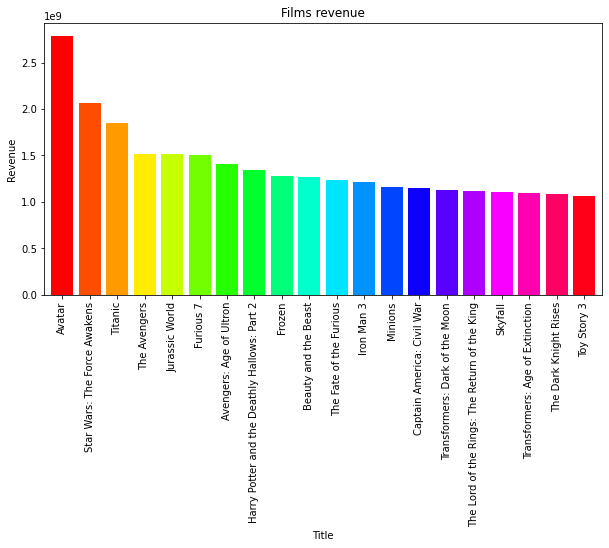

In [71]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
revenue_films = Dataset.loc[:,["title", "revenue"]].sort_values(by = "revenue", ascending=False)[0:20]
revenue_films = revenue_films.set_index("title")
plt.figure(figsize = (10, 5)) 
pd.Series(revenue_films["revenue"]).plot.bar(color = colors , width = 0.8)
plt.xlabel('Title')
plt.ylabel('Revenue')
plt.title('Films revenue')

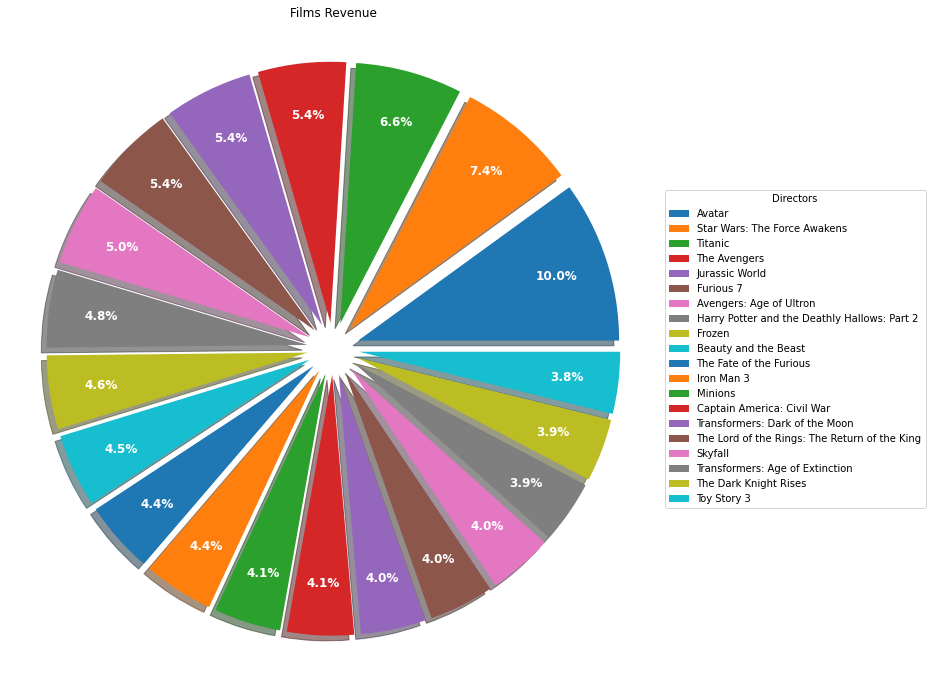

In [72]:
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(revenue_films.iloc[:,0], autopct='%1.1f%%', pctdistance=0.8,
                                  textprops=dict(color="w"), explode=np.repeat(0.1, 20), shadow= True)

ax.legend(revenue_films.iloc[:,0].index,
          title="Directors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Films Revenue")

plt.show()

In [73]:
# Pasamos las columnas noméricas a float para que se pueda operar con ellas sin problemas
Dataset["popularity"] = Dataset["popularity"].astype(float)
Dataset["budget"] = Dataset["budget"].astype(float)
Dataset["revenue"] = Dataset["revenue"].astype(float)
Dataset["vote_average"] = Dataset["vote_average"].astype(float)
Dataset["vote_count"] = Dataset["vote_count"].astype(float)
Dataset["rating"] = Dataset["rating"].astype(float)
Dataset['release_date'] = Dataset['release_date'].astype(float)

In [74]:
Dataset['return'] = Dataset['revenue'] - Dataset['budget']

Text(0.5, 1.0, 'Films return')

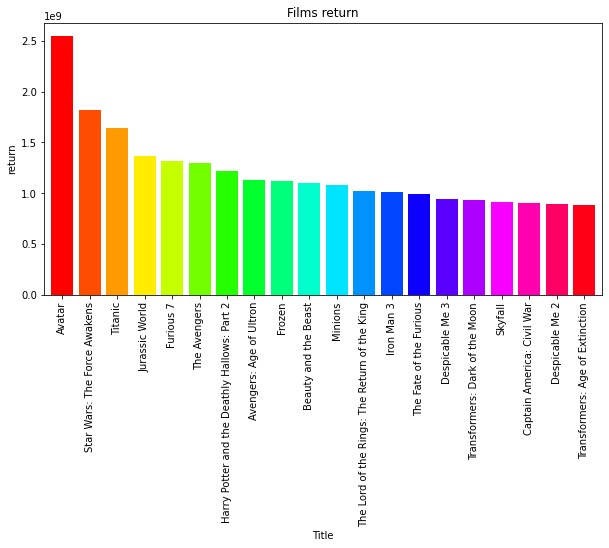

In [75]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
return_films = Dataset.loc[:,["title", "return"]].sort_values(by = "return", ascending=False)[0:20]
return_films = return_films.set_index("title")
plt.figure(figsize = (10, 5)) 
pd.Series(return_films["return"]).plot.bar(color = colors , width = 0.8)
plt.xlabel('Title')
plt.ylabel('return')
plt.title('Films return')

Text(0.5, 1.0, 'Films votes')

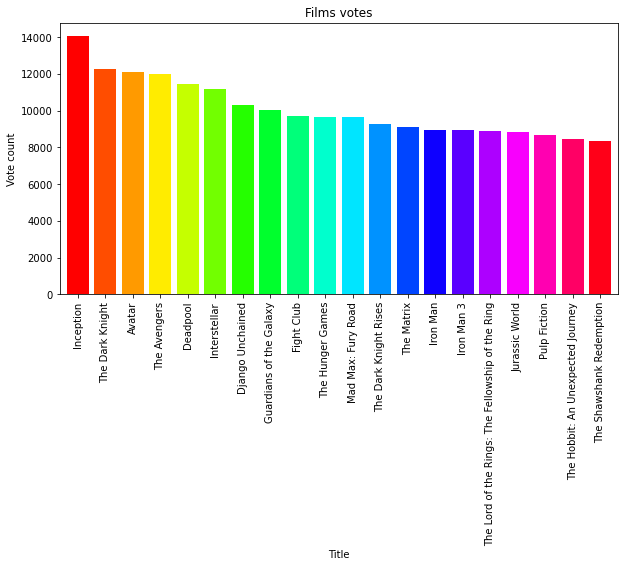

In [76]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
vote_count = Dataset.loc[:,["title", "vote_count"]].sort_values(by = "vote_count", ascending=False)[0:20]
vote_count = vote_count.set_index("title")
plt.figure(figsize = (10, 5)) 
pd.Series(vote_count["vote_count"]).plot.bar(color = colors , width = 0.8)
plt.xlabel('Title')
plt.ylabel('Vote count')
plt.title('Films votes')

In [128]:
revenue_genres = Dataset.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
revenue_genres.name = "genre"

<ipython-input-128-adf7d0ffd2cc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  revenue_genres = Dataset.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


Text(0.5, 1.0, 'Genres revenue')

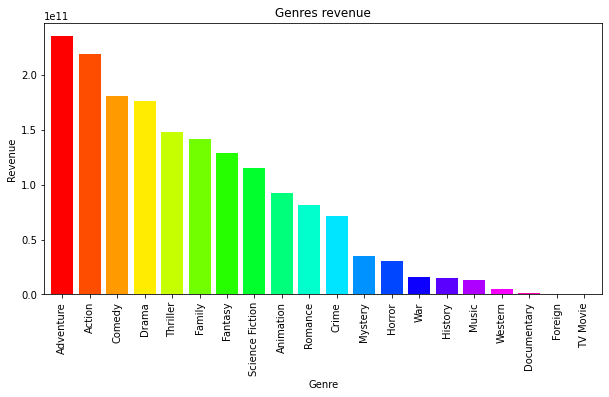

In [168]:
y = np.arange(0,20)
colors = cm.hsv(y / float(max(y)))
revenue_genres = Dataset.join(revenue_genres)[["genre", "revenue"]].groupby("genre")["revenue"].sum().sort_values(ascending = False)
plt.figure(figsize = (10, 5)) 
revenue_genres.plot.bar(color = colors , width = 0.8)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Genres revenue')

In [169]:
# Catalogamos a cada pelicula su primer género
Dataset["genre"] = Dataset["genres"].apply(lambda x: x[0] if x else np.nan)
return_max = max(Dataset["return"])
Dataset["return_ratio"] = Dataset["return"].apply(lambda x: x/return_max)
revenue_genres = revenue_genres.map(lambda x : x/revenue_genres[0])
genre_ratio = dict()
i = 0
for genre in revenue_genres.index:
    genre_ratio[genre] = revenue_genres[i]
    i+=1
genre_ratio = dict()
i = 0
for genre in revenue_genres.index:
    genre_ratio[genre] = revenue_genres[i]
    i+=1
Dataset["genre_ratio"] = 0
# A las peliculas que no disponen de genero se catalogan con el que menos ratio tiene.
Dataset["genres"] = Dataset["genres"].apply(lambda x: False if not x else x).apply(lambda x: ['TV Movie'] if not x else x)
Dataset['genre_ratio'] = Dataset['genres'].apply(lambda x: max([genre_ratio[genre] for genre in x]))
# Catalogamos la pelicula con el género que tiene un ratio más alto de entre los que dispone.
Dataset['genres'] = Dataset['genre_ratio'].apply(lambda x: list(genre_ratio.keys())[list(genre_ratio.values()).index(x)])

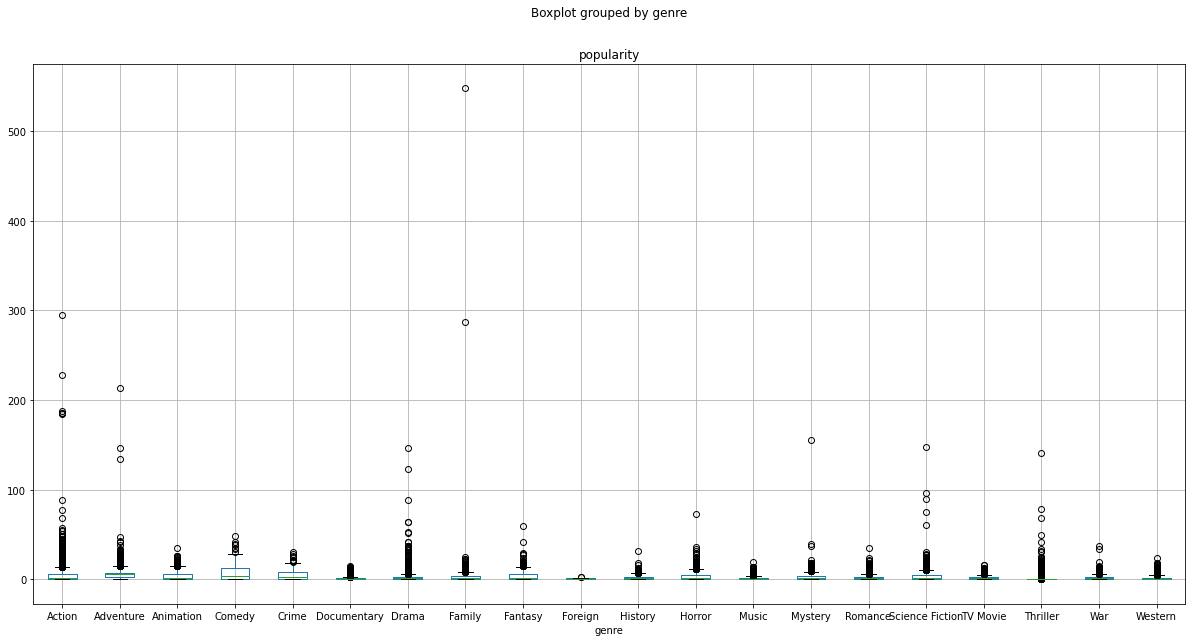

In [170]:
Dataset.boxplot('popularity', 'genre', showfliers=True, figsize = (20,10))
plt.show()

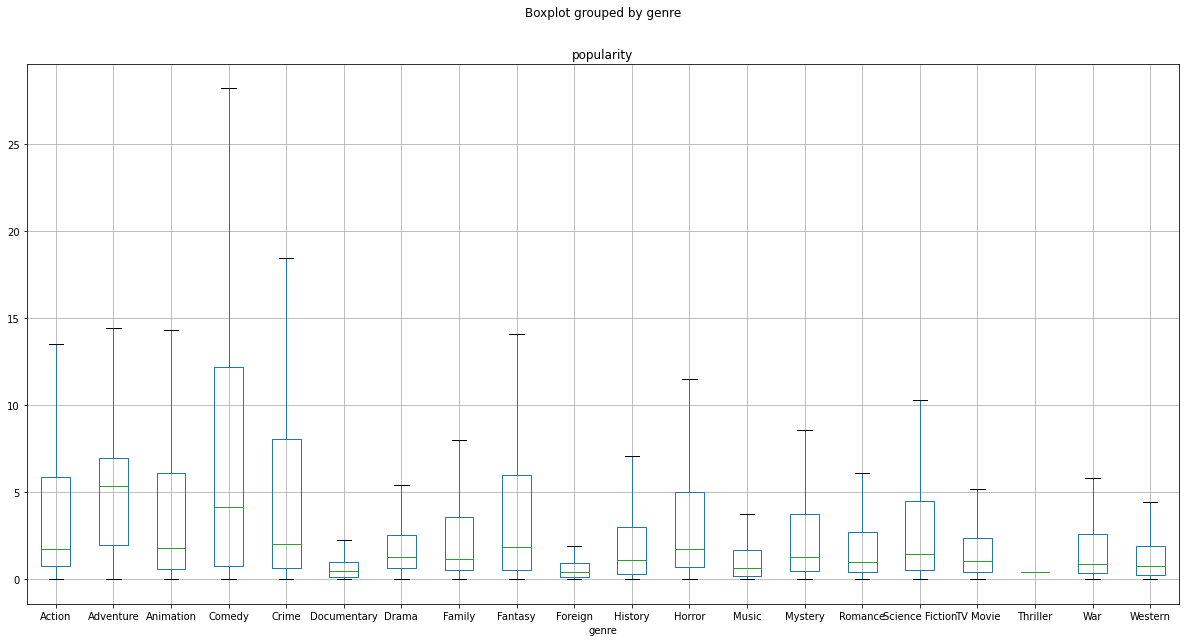

In [171]:
Dataset.boxplot('popularity', 'genre', showfliers=False, figsize = (20,10))
plt.ticklabel_format(style="plain", axis="y")# quita la notación cientifica
plt.show()

<Figure size 1296x576 with 0 Axes>

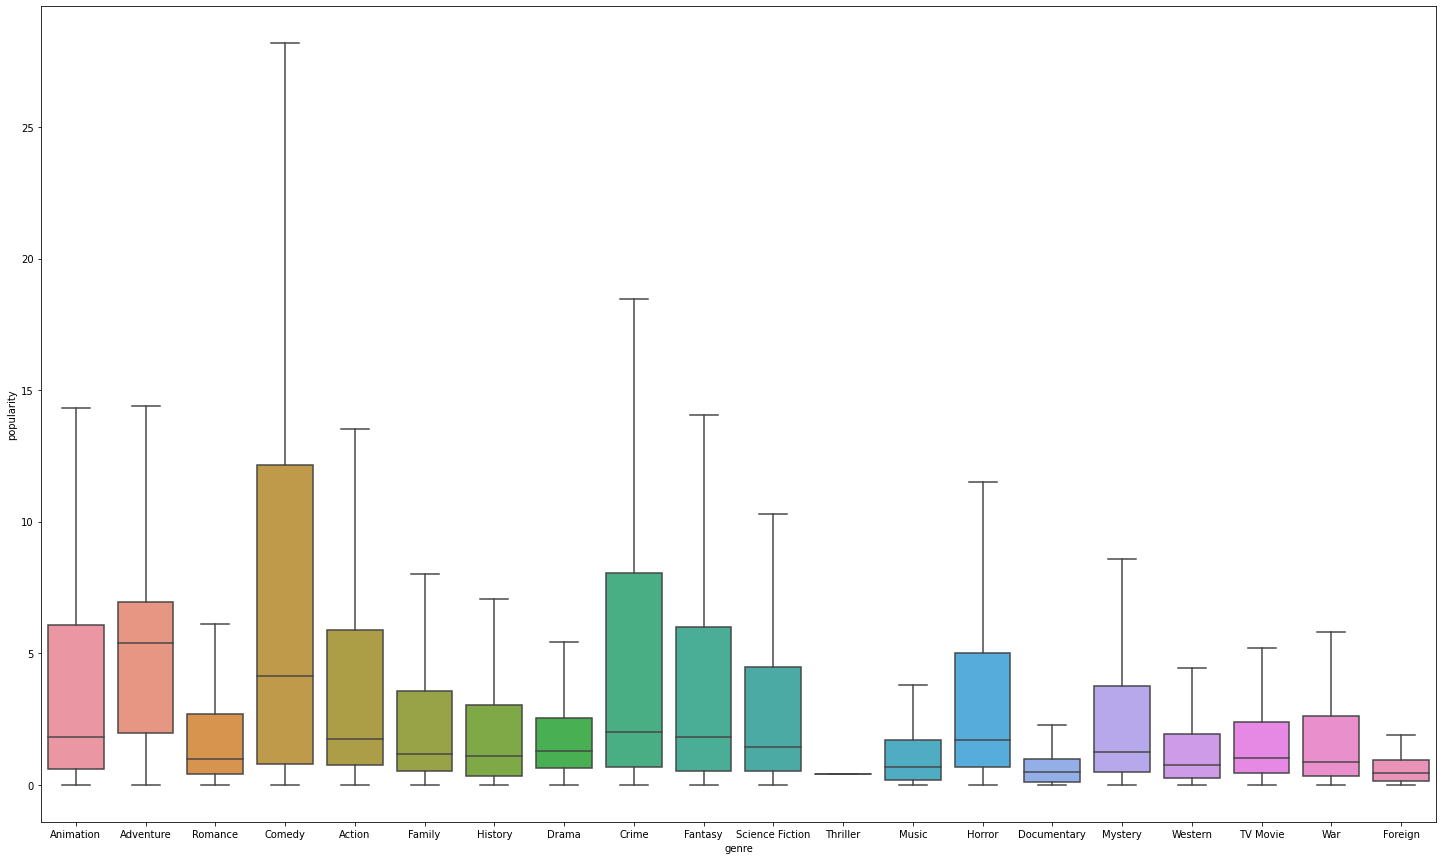

In [172]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(25, 15))
sns.boxplot(x='genre', y='popularity', data=Dataset, ax =ax, showfliers=False)
plt.show()

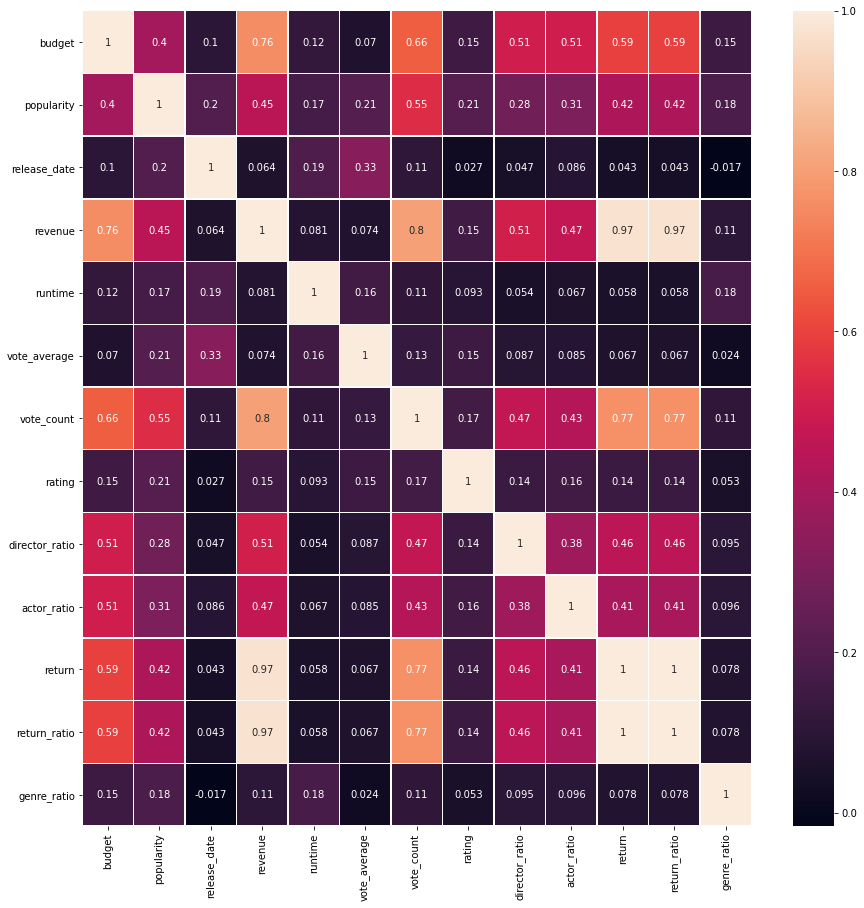

In [173]:
fig, ax = plt.subplots(figsize=(15,15))
corr = Dataset.drop("id", axis = 1).corr()
sns.heatmap(corr,annot=True,linewidths=.5,annot_kws={"fontsize":10})
plt.show()

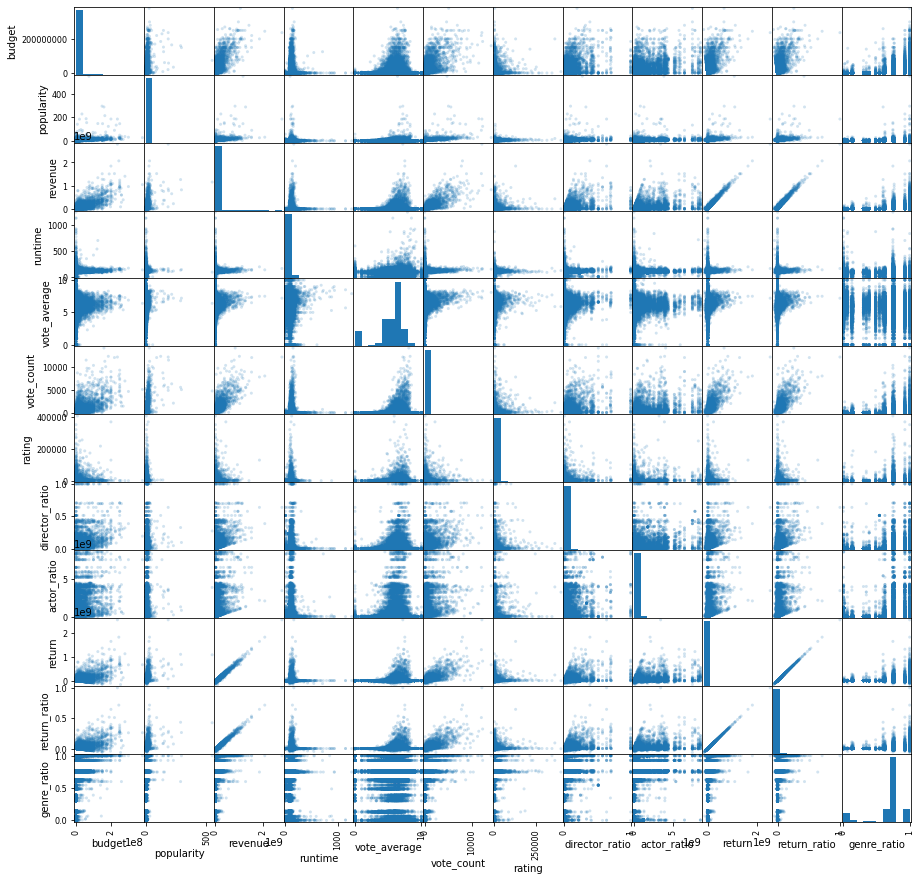

In [174]:
pd.plotting.scatter_matrix(Dataset.loc[:,['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 
                                          'vote_count', 'rating', 'director_ratio', 'actor_ratio', 'return',
                                          'return_ratio', 'genre_ratio']], alpha=0.2, figsize=(15, 15))
plt.show()

In [175]:
len(Dataset[pd.isna(Dataset["actor"])].index.tolist())

2804

In [176]:
Dataset[pd.isna(Dataset["actor"])]
index = Dataset[pd.isna(Dataset["actor"])].index.tolist()
Dataset = Dataset.drop(index, axis = 0) 
Dataset = Dataset.reset_index(drop=True)

In [177]:
len(Dataset[pd.isna(Dataset["actor"])].index.tolist())

0

In [178]:
Dataset.head()

,adult,budget,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,rating,director,actor,director_ratio,actor_ratio,return,genre,return_ratio,genre_ratio
0,False,30000000.0,862,tt0114709,en,Toy Story,21.946943,1995.0,373554033.0,81.0,Released,Toy Story,7.7,5415.0,Toy Story Collection,Comedy,[Pixar Animation Studios],[United States of America],[English],1346.0,John Lasseter,Tom Hanks,0.243719,8.277163e+09,343554033.0,Animation,0.134676,0.766793
1,False,65000000.0,8844,tt0113497,en,Jumanji,17.015539,1995.0,262797249.0,104.0,Released,Jumanji,6.9,2413.0,NaN,Adventure,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]",462.5,Joe Johnston,Robin Williams,0.152177,3.102148e+09,197797249.0,Adventure,0.077538,1.000000
2,False,0.0,15602,tt0113228,en,Grumpier Old Men,11.712900,1995.0,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,Comedy,"[Warner Bros., Lancaster Gate]",[United States of America],[English],NaN,Howard Deutch,Walter Matthau,0.018542,1.890180e+08,0.0,Romance,0.000000,0.766793
3,False,16000000.0,31357,tt0114885,en,Waiting to Exhale,3.859495,1995.0,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,NaN,Comedy,[Twentieth Century Fox Film Corporation],[United States of America],[English],NaN,Forest Whitaker,Whitney Houston,0.008799,5.170964e+08,65452156.0,Comedy,0.025658,0.766793
4,False,0.0,11862,tt0113041,en,Father of the Bride Part II,8.387519,1995.0,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,Comedy,"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],NaN,Charles Shyer,Steve Martin,0.027400,1.240517e+09,76578911.0,Comedy,0.030020,0.766793


ADECUACIÓN DEL DATASET

In [179]:
#Eliminación de variables no útiles
Dataset = Dataset.drop(columns=['id', 'imdb_id', 'original_language', 'title', 'original_title',
                                'status', 'belongs_to_collection', 'production_companies','production_countries',
                                'spoken_languages', 'production_companies'])

In [180]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75544 entries, 0 to 75543
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adult           75544 non-null  object 
 1   budget          75544 non-null  float64
 2   popularity      75544 non-null  float64
 3   release_date    75544 non-null  float64
 4   revenue         75544 non-null  float64
 5   runtime         75328 non-null  float64
 6   vote_average    75544 non-null  float64
 7   vote_count      75544 non-null  float64
 8   genres          75544 non-null  object 
 9   rating          12161 non-null  float64
 10  director        75102 non-null  object 
 11  actor           75544 non-null  object 
 12  director_ratio  75102 non-null  float64
 13  actor_ratio     75544 non-null  float64
 14  return          75544 non-null  float64
 15  genre           73829 non-null  object 
 16  return_ratio    75544 non-null  float64
 17  genre_ratio     75544 non-null 

In [181]:
#Rellenamos valores NaN
Dataset['runtime'] =  Dataset['runtime'].fillna(np.mean(Dataset['runtime']))
Dataset['rating'] =  Dataset['rating'].fillna(np.mean(Dataset['rating']))

In [182]:
Dataset = Dataset.fillna(0)

In [183]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75544 entries, 0 to 75543
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adult           75544 non-null  object 
 1   budget          75544 non-null  float64
 2   popularity      75544 non-null  float64
 3   release_date    75544 non-null  float64
 4   revenue         75544 non-null  float64
 5   runtime         75544 non-null  float64
 6   vote_average    75544 non-null  float64
 7   vote_count      75544 non-null  float64
 8   genres          75544 non-null  object 
 9   rating          75544 non-null  float64
 10  director        75544 non-null  object 
 11  actor           75544 non-null  object 
 12  director_ratio  75544 non-null  float64
 13  actor_ratio     75544 non-null  float64
 14  return          75544 non-null  float64
 15  genre           75544 non-null  object 
 16  return_ratio    75544 non-null  float64
 17  genre_ratio     75544 non-null 

In [184]:
Dataset[0:3]

,adult,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,genres,rating,director,actor,director_ratio,actor_ratio,return,genre,return_ratio,genre_ratio
0,False,30000000.0,21.946943,1995.0,373554033.0,81.0,7.7,5415.0,Comedy,1346.000000,John Lasseter,Tom Hanks,0.243719,8.277163e+09,343554033.0,Animation,0.134676,0.766793
1,False,65000000.0,17.015539,1995.0,262797249.0,104.0,6.9,2413.0,Adventure,462.500000,Joe Johnston,Robin Williams,0.152177,3.102148e+09,197797249.0,Adventure,0.077538,1.000000
2,False,0.0,11.712900,1995.0,0.0,101.0,6.5,92.0,Comedy,3393.221651,Howard Deutch,Walter Matthau,0.018542,1.890180e+08,0.0,Romance,0.000000,0.766793


In [185]:
if False or not os.path.exists('Dataset_v0.pickle'):
    pickle_file = open('Dataset_v0.pickle', 'wb')
    pickle.dump(Dataset, pickle_file)
    pickle_file.close()

In [186]:
extract_data = open('Dataset_v0.pickle', 'rb')
Dataset = pickle.load(extract_data)

In [187]:
from sklearn.preprocessing import StandardScaler

Dataset_cat = Dataset[['adult', 'genre']]
Dataset_num = Dataset.drop(columns = ['adult', 'genre', 'genres', 'director', 'actor'])
scaler = StandardScaler().fit(Dataset_num)
Dataset_num_norm = scaler.transform(Dataset_num)
Dataset_num_norm = pd.DataFrame(Dataset_num_norm, columns= Dataset_num.columns)

In [188]:
Dummies = pd.get_dummies(Dataset[['adult', 'genre']], prefix = ['adult', 'genre'])

In [189]:
Dataset_model = pd.concat([Dataset_num_norm, Dummies], axis = 1)

In [190]:
if False or not os.path.exists('Dataset_model_v0.pickle'):
    pickle_file = open('Dataset_model_v0.pickle', 'wb')
    pickle.dump(Dataset_model, pickle_file)
    pickle_file.close()

In [191]:
extract_data = open('Dataset_model_v0.pickle', 'rb')
Dataset_model = pickle.load(extract_data)

In [192]:
Dataset_model[0:2]

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,rating,director_ratio,actor_ratio,return,return_ratio,genre_ratio,adult_False,adult_True,genre_0,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,1.926445,3.552832,0.067623,7.276510,-0.600292,1.105220,13.803198,-0.318832,5.327714,13.017401,8.329839,8.329839,0.286212,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.425361,2.626288,0.067623,5.075541,0.172328,0.711077,6.024005,-0.456428,3.249287,4.725909,4.750290,4.750290,1.326002,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Eliminación de multicolinealidad

In [193]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.to_numpy().max() > max_VIF:
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [194]:
calculateVIF(Dataset_model)
model_vars = selectDataUsingVIF(Dataset_model)
calculateVIF(model_vars) # Vemos que se quitan 7 variables

<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
<ipython-input-193-5fe92443cfaf>:22: RuntimeWarning: divide by zero encountered in double_scalars
  result[y_featue] = 1/(1 - model.sco

,popularity,release_date,runtime,vote_average,vote_count,rating,director_ratio,actor_ratio,return_ratio,genre_ratio,adult_True,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
VIF,1.672024,1.263201,1.133192,1.264768,3.048685,1.017798,1.404297,1.346771,2.577414,2.325437,1.000646,1.250845,1.222582,1.055084,1.323537,1.061526,1.778305,1.015854,1.02105,1.004534,1.008543,1.176344,1.034723,1.017224,1.024117,1.016982,1.009401,1.250757,1.011795,1.079085


In [195]:
filtro = Dataset_model.columns.isin(model_vars.columns)==False
print("Las variables excluidas del modelo son :", list(Dataset_model.columns[filtro]))
print("Las variables que se usarán en el modelo son:", list(model_vars.columns))

Las variables excluidas del modelo son : ['budget', 'revenue', 'return', 'adult_False', 'genre_0', 'genre_Drama']
Las variables que se usarán en el modelo son: ['popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'rating', 'director_ratio', 'actor_ratio', 'return_ratio', 'genre_ratio', 'adult_True', 'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History', 'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance', 'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller', 'genre_War', 'genre_Western']


In [196]:
features = list(model_vars.columns)
x = Dataset_model[features]
y = Dataset_model['revenue']

In [197]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [198]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
try:
    model = sm.OLS(y_train.astype(float),x_train.astype(float))
    result = model.fit()
    print (result.summary())
    
except np.linalg.linalg.LinAlgError as err:
    if 'Singular matrix' in err.message:
        print ("MODEL-INVALID (Singular Matrix)")
    else:
        raise
# Predicción del modelo
y_pred = result.predict(x_test)
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          4.486e+04
Date:                Sun, 03 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:24:04   Log-Likelihood:                          13746.
No. Observations:               50614   AIC:                                 -2.743e+04
Df Residuals:                   50584   BIC:                                 -2.717e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [199]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

# Predicción del modelo
y_pred = model.predict(x_test);

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))

R^2 0.9652400997928706
Error cuadrático medio 0.03637116930061838
Error absoluto medio 0.06839247866058026
Mediana del error absoluto 0.01874164142129782


In [200]:
from sklearn.linear_model import Lasso
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

# Creación del modelo
model = Lasso()

param_grid = dict(alpha = sp_rand())

rsearch = RandomizedSearchCV(estimator = model,
                             param_distributions = param_grid,
                             n_iter = 100,
                             cv = 10,
                             random_state = 1)
rsearch.fit(x_train, y_train)

# Los mejores parametros para el modelo
print('El mejor parametro es', rsearch.best_params_)
print('El mejor score es', rsearch.best_score_)

El mejor parametro es {'alpha': 0.00011437481734488664}
El mejor score es 0.9614604022794764


In [201]:
from sklearn.linear_model import LinearRegression

model = Lasso(alpha = rsearch.best_params_['alpha'])
model.fit(x_train, y_train)

# Predicción del modelo
y_pred = model.predict(x_test);

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y_test))
print('Error absoluto medio', mean_absolute_error(y_pred, y_test))
print('Mediana del error absoluto', median_absolute_error(y_pred, y_test))

R^2 0.9652121757457115
Error cuadrático medio 0.03640235938149472
Error absoluto medio 0.06775118976772573
Mediana del error absoluto 0.01987974758921321


El modelo Lasso tiene un menor error

Sistema de recomendaciones basado en contenido

In [202]:
metadata = metadata[['id', 'title', 'genres']]
metadata[0:5]

,id,title,genres
0,862,Toy Story,"[Animation, Comedy, Family]"
1,8844,Jumanji,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,[Comedy]


In [203]:
Genres_df = metadata.copy()

for index in range(len(metadata)):
    for genre in metadata['genres'][index]:
        if genre in Genres_df:
            Genres_df[genre][index] = 1
        else:  
            Genres_df[genre] = 0
            Genres_df[genre][index] = 1

<ipython-input-203-ac1b7ccc6699>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genres_df[genre][index] = 1
<ipython-input-203-ac1b7ccc6699>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Genres_df[genre][index] = 1


In [204]:
Genres_df.head()

,id,title,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,862,Toy Story,"[Animation, Comedy, Family]",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,Jumanji,"[Adventure, Fantasy, Family]",0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15602,Grumpier Old Men,"[Romance, Comedy]",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11862,Father of the Bride Part II,[Comedy],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [205]:
inputMovies = pd.DataFrame({'title': metadata['title'][30:40],
                            'rating': np.linspace(0,5, 10)})
inputMovies

,title,rating
30,Dangerous Minds,0.000000
31,Twelve Monkeys,0.555556
32,Wings of Courage,1.111111
33,Babe,1.666667
34,Carrington,2.222222
35,Dead Man Walking,2.777778
36,Across the Sea of Time,3.333333
37,It Takes Two,3.888889
38,Clueless,4.444444
39,"Cry, the Beloved Country",5.000000


In [206]:
#Filtrado de películas por título
inputId = metadata[metadata['title'].isin(inputMovies['title'])]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop(columns = 'genres')
inputMovies

,id,title,rating
0,9909,Dangerous Minds,0.000000
1,63,Twelve Monkeys,0.555556
2,78802,Wings of Courage,1.111111
3,9598,Babe,1.666667
4,47018,Carrington,2.222222
5,687,Dead Man Walking,2.777778
6,139405,Across the Sea of Time,3.333333
7,33689,It Takes Two,3.888889
8,110538,It Takes Two,3.888889
9,9603,Clueless,4.444444


In [207]:
#Descartando las películas de la entrada de datos
userMovies = Genres_df[Genres_df['id'].isin(inputMovies['id'])]
userMovies

,id,title,genres,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
30,9909,Dangerous Minds,"[Drama, Crime]",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
31,63,Twelve Monkeys,"[Science Fiction, Thriller, Mystery]",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
32,78802,Wings of Courage,"[Romance, Adventure]",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,9598,Babe,"[Fantasy, Drama, Comedy, Family]",0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34,47018,Carrington,"[History, Drama, Romance]",0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
35,687,Dead Man Walking,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,139405,Across the Sea of Time,"[Adventure, History, Drama, Family]",0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
37,33689,It Takes Two,"[Comedy, Family, Romance]",0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,9603,Clueless,"[Comedy, Drama, Romance]",0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
39,34615,"Cry, the Beloved Country",[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [208]:
userMovies = userMovies.reset_index(drop=True)
#Eliminando problemas innecesarios para ahorrar memoria y evitar conflictos
usertable = userMovies.drop(columns = ['id', 'title', 'genres'])
usertable

,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [209]:
#Producto escalar
userProfile = usertable.transpose().dot(inputMovies['rating'])
#Perfil del usuario
userProfile

Animation           0.000000
Comedy             14.444444
Family              8.888889
Adventure           4.444444
Fantasy             1.666667
Romance            16.111111
Drama              23.333333
Action              0.000000
Crime               0.000000
Thriller            0.555556
Horror              0.000000
History             5.555556
Science Fiction     0.555556
Mystery             0.555556
War                 0.000000
Foreign             0.000000
Music               0.000000
Documentary         0.000000
Western             0.000000
TV Movie            0.000000
dtype: float64

In [210]:
genretable = Genres_df.set_index(Genres_df['id'])
#Y eliminemos información innecesaria
genretable = genretable.drop(columns = ['title', 'genres'])
genretable.head()

,id,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science Fiction,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
id,,,,,,,,,,,,,,,,,,,,,
862,862,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8844,8844,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15602,15602,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31357,31357,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11862,11862,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
recommendation_df = ((genretable*userProfile).sum(axis=1))/(userProfile.sum())
recommendation_df.head()

id
862      0.306569
8844     0.197080
15602    0.401460
31357    0.708029
11862    0.189781
dtype: float64

In [212]:
#Ordena la recomendación
recommendation_df = recommendation_df.sort_values(ascending=False)
recommendation_df.head()

id
32834    0.905109
39227    0.883212
17130    0.883212
183      0.883212
65592    0.854015
dtype: float64

In [213]:
metadata[metadata['id'].isin(recommendation_df[0:9].keys())]

,id,title,genres
4144,8076,Tuvalu,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."
4554,183,The Wizard,"[Adventure, Comedy, Drama, Family, Romance]"
4975,17130,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus..."
14384,32834,MVP: Most Valuable Primate,"[Action, Adventure, Comedy, Drama, Family, Fan..."
25703,15888,Fishtales,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."
26012,39227,When in Rome,"[Action, Adventure, Comedy, Drama, Family, Rom..."
34379,65592,Princes and Princesses,"[Fantasy, Animation, Drama, Science Fiction, R..."
40384,388256,Mamaboy,"[Comedy, Drama, Family, Fantasy, Romance, Scie..."
43915,55710,Deal of a Lifetime,"[Fantasy, Drama, Comedy, Science Fiction, Roma..."


In [214]:
def recomendation(inputMovies):
    inputId = metadata[metadata['title'].isin(inputMovies['title'])]
    inputMovies = pd.merge(inputId, inputMovies)
    inputMovies = inputMovies.drop(columns = 'genres')
    userMovies = Genres_df[Genres_df['id'].isin(inputMovies['id'])]
    userMovies = userMovies.reset_index(drop=True)
    usertable = userMovies.drop(columns = ['id', 'title', 'genres'])
    userProfile = usertable.transpose().dot(inputMovies['rating'])
    genretable = Genres_df.set_index(Genres_df['id'])
    genretable = genretable.drop(columns = ['id', 'title', 'genres'])
    recommendation_df = ((genretable*userProfile).sum(axis=1))/(userProfile.sum())
    recommendation_df = recommendation_df.sort_values(ascending=False)
    return metadata[metadata['id'].isin(recommendation_df[0:9].keys())]

In [215]:
inputMovies = pd.DataFrame({'title': metadata['title'][50:60],
                            'rating': np.linspace(0, 5, 10)})
recomendation(inputMovies)

,id,title,genres
3989,26156,Hiding Out,"[Action, Adventure, Comedy, Drama, Family, Thr..."
4975,17130,Crossroads,"[Action, Adventure, Comedy, Drama, Family, Mus..."
6421,71714,"Lucía, Lucía","[Adventure, Drama, Comedy, Thriller, Crime, Ro..."
11833,14207,The Librarian: Quest for the Spear,"[Thriller, Adventure, Action, Comedy, Drama, F..."
14384,32834,MVP: Most Valuable Primate,"[Action, Adventure, Comedy, Drama, Family, Fan..."
18149,10109,The White Dragon,"[Action, Adventure, Comedy, Drama, Fantasy, Ro..."
18640,29694,One of Our Dinosaurs Is Missing,"[Action, Adventure, Comedy, Drama, Family, Mys..."
26012,39227,When in Rome,"[Action, Adventure, Comedy, Drama, Family, Rom..."
27088,200654,Raffles,"[Adventure, Comedy, Crime, Drama, History, Rom..."
